In [136]:
import os 
import numpy as np
import tensorflow as tf
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import os

In [137]:
model = tf.keras.models.load_model('image_classification_model.h5')

In [138]:


diretorio = f'data/test/'

imagens = []
resposta = []

#percorre cada arquivo do diretorio
img_path = 'data/produtive/baseimg.jpg'

img = image.load_img(img_path, target_size=(4480, 4480))  # Substitua o tamanho alvo conforme necessário
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalização da imagem (se não foi feito durante o treinamento)


In [139]:
def divide_matriz_quadrada(matriz, n):
    tamanho_submatriz = len(matriz) // n  # Calcula o tamanho de cada submatriz
    submatrizes = []

    for i in range(0, len(matriz), tamanho_submatriz):
        for j in range(0, len(matriz), tamanho_submatriz):
            submatriz = matriz[i:i+tamanho_submatriz, j:j+tamanho_submatriz]
            submatrizes.append(submatriz)
            

    return submatrizes



n = 35 # Dividir em 2 submatrizes quadradas
submatrizes = divide_matriz_quadrada(img_array[0], n)

# Exibir as submatrizes resultantes

In [141]:
class_names = ['agua', 'area_preservacao', 'construcao', 'estrada', 'eucalipto', 'pasto', 'plantacao']  # Lista das classes em ordem

predict = []
prob = []

for imagem in submatrizes:
    
    
    predictions = model.predict(np.array([imagem]))

    # # Obtenha a classe prevista
    class_index = np.argmax(predictions)
    predicted_class = class_names[class_index]

    predict.append(predicted_class)
    prob.append(predictions)


1/1 [==============================] - 0s 26ms/step


In [142]:
x = pd.DataFrame({'predict' : predict}).reset_index()

In [143]:
x['i'] = x['index']//n
x['j'] = x['index']%n

In [156]:

cores_letras = {
    "agua": "blue",
    "area_preservacao": "green",
    "estrada": "gray",
    "plantacao": "red",
    "construcao": "purple",
    "eucalipto": "orange",
    "pasto": "yellow",
    # "I": "magenta"
}


toint = {
    "agua": 1,
    "area_preservacao": 2,
    "estrada": 3,
    "plantacao": 4,
    "construcao": 5,
    "eucalipto": 6,
    "pasto": 7,
    # "I": "magenta"
}

x['cores'] = x['predict'].map(cores_letras)
x['int'] = x['predict'].map(toint)


matriz = pd.pivot_table(x,
               index = 'i',
               columns = 'j',
               values = 'predict',
               aggfunc=max)

matriz_cores = pd.pivot_table(x,
               index = 'i',
               columns = 'j',
               values = 'cores',
               aggfunc=max)

matriz_int = pd.pivot_table(x,
               index = 'i',
               columns = 'j',
               values = 'int',
               aggfunc=max)

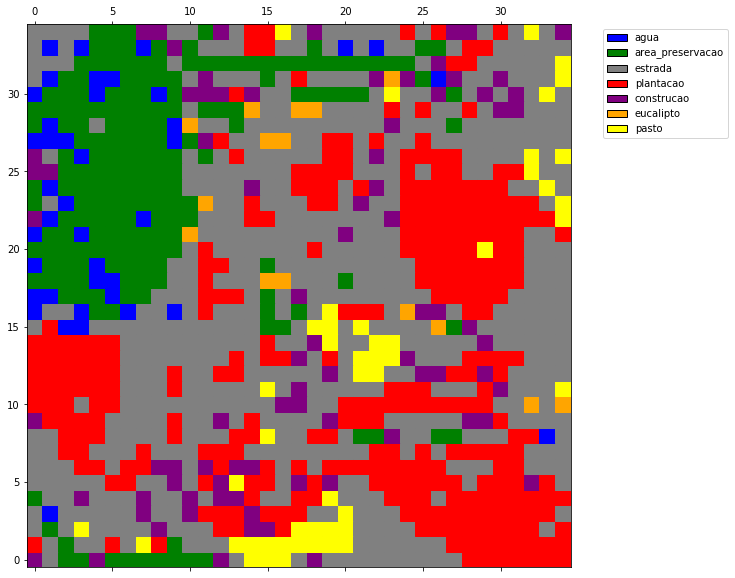

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Criar uma figura e um eixo para o heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Plotar o heatmap com as cores personalizadas
cax = ax.matshow(matriz_int, cmap='viridis')  # Usando cmap apenas para criar um objeto cax

# Criar um objeto Rectangle para cada célula do heatmap com a cor apropriada
for i in range(matriz_cores.shape[0]):
    for j in range(matriz_cores.shape[1]):
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=matriz_cores[j].iloc[i]))

# Definir limites dos eixos
ax.set_xlim(-0.5, len(matriz[0]) - 0.5)
ax.set_ylim(-0.5, len(matriz) - 0.5)

legend_elements = [Patch(facecolor=cor, edgecolor='black', label=letra) for letra, cor in cores_letras.items()]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))


# Mostrar o heatmap
plt.show()

In [148]:
np.arange(len(cores_letras))

array([0, 1, 2, 3, 4, 5, 6])